In [5]:
import numpy as np
from keras_preprocessing.image import load_img
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras.layers import Input, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras import backend as K

In [6]:
image = "image"
mask = "mask"


In [7]:
def feature_extraction(dir):
    lis = []
    if dir == "image":
        enter = False
    else:
        enter = True
    for image in os.listdir(dir):
        img = load_img(os.path.join(dir,image),grayscale=enter)
        img = np.array(img)
        lis.append(img)
    return np.array(lis)
        

In [8]:
image = feature_extraction(image)

In [9]:
image.shape

(215, 360, 480, 3)

In [10]:
masks= feature_extraction(mask)

C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
masks.shape

(215, 360, 480)

In [12]:
tf_images = tf.convert_to_tensor(image, dtype=tf.float32)
tf_masks = tf.convert_to_tensor(masks,dtype=tf.float32)

In [13]:
tf_images

<tf.Tensor: shape=(215, 360, 480, 3), dtype=float32, numpy=
array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[ 86.,  94.,  77.],
         [ 89.,  88.,  76.],
         [ 91.,  87.,  75.],
         ...,
         [ 53., 111.,  72.],
         [ 50., 110.,  60.],
         [ 49., 126.,  73.]],

        [[ 85., 103.,  77.],
         [ 85.,  92.,  76.],
         [ 86.,  87.,  76.],
         ...,
         [ 55.,  92.,  60.],
         [ 55.,  93.,  58.],
       

In [14]:
tf_masks

<tf.Tensor: shape=(215, 360, 480), dtype=float32, numpy=
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 76., 76., 76.],
        [ 0.,  0.,  0., ..., 76., 76., 76.],
        [ 0.,  0.,  0., ..., 76., 76., 76.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [76., 76., 76., ...,  0.,  0.,  0.],
        [76., 76., 76., ...,  0.,  0.,  0.],
        [76., 76., 76., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  

In [15]:
x_train,x_test,y_train,y_test = train_test_split(image,masks,test_size=0.4)

In [16]:
x_train,x_test = tf.convert_to_tensor(x_train, dtype=tf.float32),tf.convert_to_tensor(x_test,dtype=tf.float32)
y_train,y_test = tf.convert_to_tensor(y_train,dtype=tf.float32),tf.convert_to_tensor(y_test,dtype=tf.float32)

In [17]:
x_train

<tf.Tensor: shape=(129, 360, 480, 3), dtype=float32, numpy=
array([[[[ 95.,  86.,  79.],
         [ 92.,  86.,  77.],
         [ 88.,  84.,  78.],
         ...,
         [ 78.,  82.,  69.],
         [ 75.,  90.,  70.],
         [ 70., 104.,  74.]],

        [[ 95.,  90.,  82.],
         [ 91.,  85.,  79.],
         [ 86.,  82.,  74.],
         ...,
         [ 79.,  82.,  70.],
         [ 73.,  88.,  70.],
         [ 67., 105.,  70.]],

        [[ 94.,  97.,  83.],
         [ 92.,  88.,  83.],
         [ 86.,  85.,  76.],
         ...,
         [ 75.,  89.,  70.],
         [ 72.,  93.,  68.],
         [ 68.,  99.,  68.]],

        ...,

        [[ 93.,  91.,  83.],
         [ 95.,  90.,  79.],
         [ 94.,  91.,  77.],
         ...,
         [ 80.,  79.,  68.],
         [ 73.,  73.,  64.],
         [ 80.,  72.,  69.]],

        [[ 99.,  94.,  88.],
         [ 94.,  94.,  84.],
         [ 95.,  93.,  79.],
         ...,
         [ 82.,  86.,  69.],
         [ 80.,  79.,  72.],
       

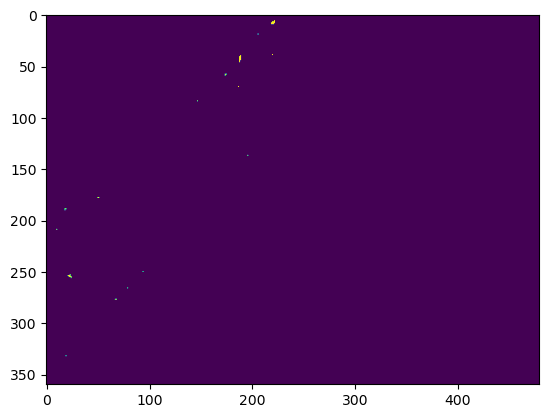

In [18]:
import matplotlib.pyplot as plt
plt.imshow(y_train[2])
plt.show()

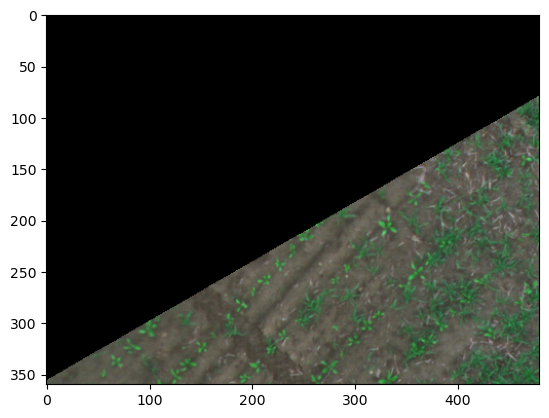

In [19]:
plt.imshow(image[0])
plt.show()

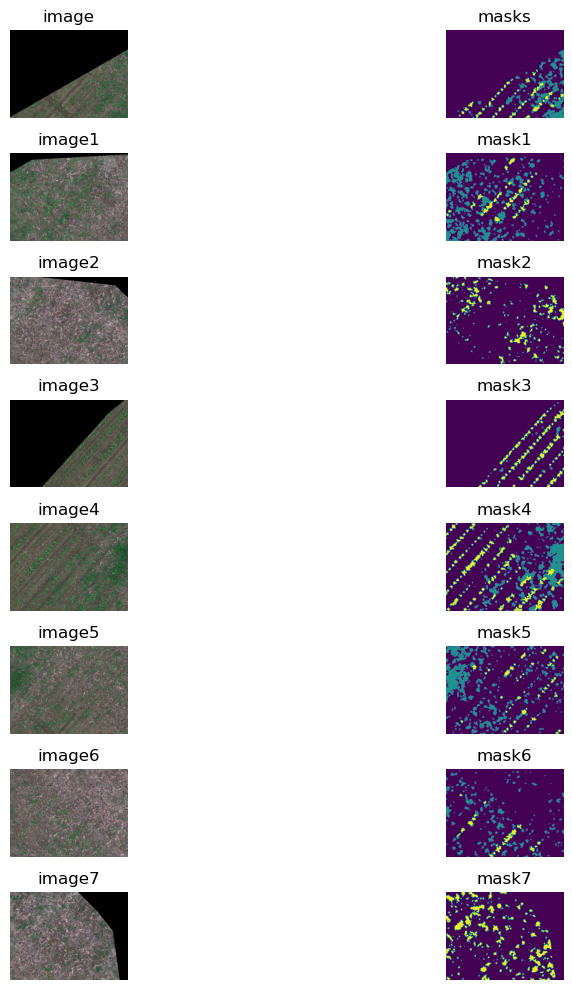

In [20]:
fig, axes = plt.subplots(8, 2, figsize=(12, 10))

for number in range(8):
    axes[number,0].set_title("image"+str(number))
    axes[number,0].imshow(image[number])
    axes[number,0].axis("off")
    axes[number,1].set_title("mask"+str(number))
    axes[number,1].imshow(masks[number])
    axes[number,1].axis("off")

for delta in range(2):
    if delta == 0:
        name = "image"
    else:
        name = "masks"
    axes[0,delta].set_title(name)
plt.tight_layout()
plt.show()


In [22]:
masks.shape

(215, 360, 480)

In [23]:
image.shape

(215, 360, 480, 3)

In [24]:
from tensorflow.keras.layers import Input, Conv3D, ReLU, BatchNormalization, MaxPooling3D, Conv3DTranspose, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import mixed_precision

from tensorflow.keras.layers import Input, Conv2D, ReLU, MaxPooling2D, Conv2DTranspose, Concatenate, Cropping2D


def light_conv_block(x, filters):
    """Optimized convolution block with reduced parameters"""
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = ReLU()(x)
    return x  # Removed BatchNorm to save memory

def smart_crop(target, reference):
    """Crops reference tensor to match target dimensions"""
    target_shape = K.int_shape(target)
    ref_shape = K.int_shape(reference)
    
    # Calculate cropping offsets (height, width)
    crop_h = (ref_shape[1] - target_shape[1]) // 2
    crop_w = (ref_shape[2] - target_shape[2]) // 2
    
    return Cropping2D(((crop_h, crop_h), (crop_w, crop_w)))(reference)

def optimized_unet(input_shape=(360, 480, 3)):
    inputs = Input(input_shape)
    
    # Encoder (Downsampling) - Reduced depth
    # Block 1
    c1 = light_conv_block(inputs, 16)
    c1 = light_conv_block(c1, 16)
    p1 = MaxPooling2D((2, 2))(c1)  # 180x240
    
    # Block 2
    c2 = light_conv_block(p1, 32)
    c2 = light_conv_block(c2, 32)
    p2 = MaxPooling2D((2, 2))(c2)  # 90x120
    
    # Block 3
    c3 = light_conv_block(p2, 64)
    c3 = light_conv_block(c3, 64)
    p3 = MaxPooling2D((2, 2))(c3)  # 45x60
    
    # Bottleneck (No deeper layers)
    bottleneck = light_conv_block(p3, 128)
    bottleneck = light_conv_block(bottleneck, 128)
    
    # Decoder (Upsampling) with smart cropping
    # Up 1
    u1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bottleneck)
    c3_cropped = smart_crop(u1, c3)
    u1 = Concatenate()([u1, c3_cropped])
    u1 = light_conv_block(u1, 64)
    
    # Up 2
    u2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(u1)
    c2_cropped = smart_crop(u2, c2)
    u2 = Concatenate()([u2, c2_cropped])
    u2 = light_conv_block(u2, 32)
    
    # Up 3
    u3 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(u2)
    c1_cropped = smart_crop(u3, c1)
    u3 = Concatenate()([u3, c1_cropped])
    u3 = light_conv_block(u3, 16)
    
    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(u3)
    
    return Model(inputs, outputs)

# Create model (RAM usage ~3-4GB during training)
model = optimized_unet()
model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 360, 480, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 360, 480, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu (ReLU)                  │ (None, 360, 480, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 360, 480, 16)      │           2,320 │ re_lu[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_1 (ReLU)                │ (None, 360, 480, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 180, 240, 16)      │               0 │ re_lu_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 180, 240, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_2 (ReLU)                │ (None, 180, 240, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 180, 240, 32)      │           9,248 │ re_lu_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_3 (ReLU)                │ (None, 180, 240, 32)      │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 90, 120, 32)       │               0 │ re_lu_3[0][0]              │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 90, 120, 64)       │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_4 (ReLU)                │ (None, 90, 120, 64)       │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 90, 120, 64)       │          36,928 │ re_lu_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_5 (ReLU)                │ (None, 90, 120, 64)       │               0 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 45, 60, 64)        │               0 │ re_lu_5[0][0]              │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 433,537 (1.65 MB)

 Trainable params: 433,537 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU


In [26]:
def get_callbacks():
    callbacks = [
        
        
        # Stop training if no improvement for 10 epochs
        EarlyStopping(monitor='val_loss', 
                      patience=10, 
                      verbose=1,
                      restore_best_weights=True),
        
        # Reduce learning rate when plateau
        ReduceLROnPlateau(monitor='val_loss', 
                          factor=0.1, 
                          patience=5, 
                          verbose=1, 
                          min_lr=1e-6),
        
        # Log training metrics to CSV
        CSVLogger('training_log.csv')
    ]
    return callbacks

# Compile the Model
def compile_unet(model):
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
                  metrics=['accuracy', MeanIoU(num_classes=2)])
    return model

In [27]:
model = optimized_unet()  # Use your corrected input shape
    
    # Compile
model = compile_unet(model)
callbacks = get_callbacks()    
    # View summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 360, 480, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 360, 480, 16)      │             448 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_11 (ReLU)               │ (None, 360, 480, 16)      │               0 │ conv2d_12[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_13 (Conv2D)            │ (None, 360, 480, 16)      │           2,320 │ re_lu_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_12 (ReLU)               │ (None, 360, 480, 16)      │               0 │ conv2d_13[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 180, 240, 16)      │               0 │ re_lu_12[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_14 (Conv2D)            │ (None, 180, 240, 32)      │           4,640 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_13 (ReLU)               │ (None, 180, 240, 32)      │               0 │ conv2d_14[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_15 (Conv2D)            │ (None, 180, 240, 32)      │           9,248 │ re_lu_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_14 (ReLU)               │ (None, 180, 240, 32)      │               0 │ conv2d_15[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 90, 120, 32)       │               0 │ re_lu_14[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_16 (Conv2D)            │ (None, 90, 120, 64)       │          18,496 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_15 (ReLU)               │ (None, 90, 120, 64)       │               0 │ conv2d_16[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_17 (Conv2D)            │ (None, 90, 120, 64)       │          36,928 │ re_lu_15[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_16 (ReLU)               │ (None, 90, 120, 64)       │               0 │ conv2d_17[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 45, 60, 64)        │               0 │ re_lu_16[0][0]             │
│ (MaxPooling2D)                │                           │               

 Total params: 433,537 (1.65 MB)

 Trainable params: 433,537 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
x_train =tf.cast(x_train,tf.float16)
y_train = tf.cast(y_train,tf.float16)

In [31]:
x_train = x_train/255.0
y_train = y_train/255.0

In [33]:
model.fit(x_train, y_train,
epochs=100,
batch_size=8,
callbacks=callbacks)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9257 - loss: 0.6739 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/100


C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,mean_io_u
  current = self.get_monitor_value(logs)
C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,mean_io_u,learning_rate.
  callback.on_epoch_end(epoch, logs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9467 - loss: 0.6280 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9367 - loss: 0.4870 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9399 - loss: 0.1882 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9410 - loss: 0.1617 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9416 - loss: 0.1609 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9313 - loss: 0.1589 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 995ms/step - accuracy: 0.9380 - loss: 0.1397 - mean_io_u: 1.0000 - learning_rate: 1.0000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9328 - loss: 

In [36]:
import pandas as pd
data = pd.read_csv("training_log.csv")

In [37]:
data


,epoch,accuracy,learning_rate,loss,mean_io_u,val_accuracy,val_learning_rate,val_loss,val_mean_io_u
0,0,0.930442,0.0001,0.666619,1.0,NaN,NaN,NaN,NaN
1,1,0.936914,0.0001,0.612748,1.0,NaN,NaN,NaN,NaN
2,2,0.936886,0.0001,0.408394,1.0,NaN,NaN,NaN,NaN
3,3,0.936809,0.0001,0.191617,1.0,NaN,NaN,NaN,NaN
4,4,0.936950,0.0001,0.165335,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,95,0.936684,0.0001,0.054711,1.0,NaN,NaN,NaN,NaN
96,96,0.936828,0.0001,0.053778,1.0,NaN,NaN,NaN,NaN
97,97,0.936848,0.0001,0.053693,1.0,NaN,NaN,NaN,NaN
98,98,0.936844,0.0001,0.053577,1.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'epoch vs loss')

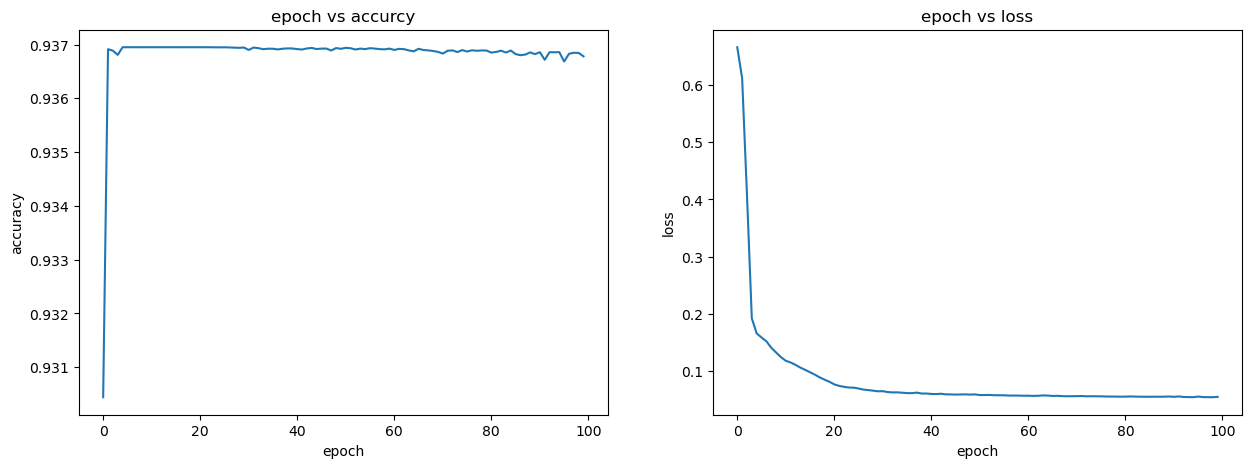

In [115]:
fig,axes = plt.subplots(1,2,figsize=(15,5))


axes[0].plot(data["epoch"],data["accuracy"])
axes[0].set_xlabel("epoch")
axes[0].set_ylabel('accuracy')
axes[0].set_title("epoch vs accurcy")

axes[1].plot(data["epoch"],data["loss"])
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("loss")
axes[1].set_title("epoch vs loss")


In [43]:
x_test

<tf.Tensor: shape=(86, 360, 480, 3), dtype=float32, numpy=
array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 92.,  91.,  75.],
         [ 91.,  92.,  76.],
         [ 89., 104.,  80.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 96.,  98.,  78.],
         [ 95.,  98.,  78.],
         [ 91.,  97.,  75.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [101.,  92.,  83.],
         [101.,  92.,  79.],
         [ 93.,  92.,  71.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 77.,  75.,  68.],
         [ 74.,  70.,  63.],
         [ 74.,  69.,  63.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 74.,  75.,  64.],
         [ 73.,  68.,  59.],
        

In [79]:
x_test = tf.cast(x_test, tf.float32)

In [80]:
y_test = tf.cast(y_test,tf.float32)

In [81]:
x_test = x_test.numpy()

In [82]:
y_test = y_test.numpy()

In [73]:
pred_output =model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [55]:
fig, axes = plt.subplots(8, 2, figsize=(12, 10))

for number in range(8):
    axes[number,0].set_title("image"+str(number))
    axes[number,0].imshow(image[number])

TensorShape([86, 360, 480, 3])

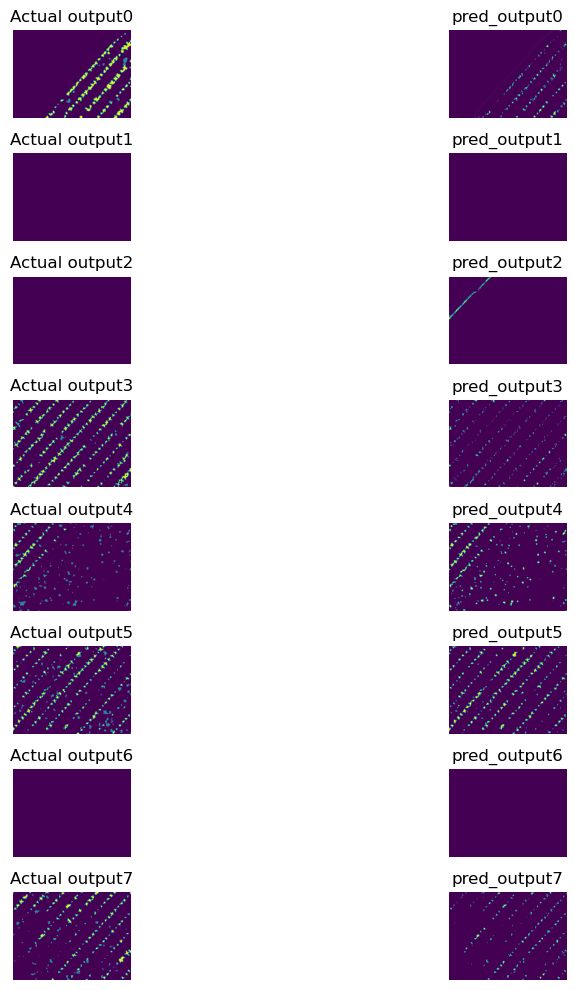

In [102]:
fig, axes = plt.subplots(8,2,figsize=(12,10))
for h in range(8):
    axes[h,1].set_title("pred_output"+str(h))
    axes[h,1].imshow(pred_output[h])
    axes[h,1].axis("off")
    axes[h,0].set_title("Actual output"+str(h))
    axes[h,0].imshow(y_test[h])
    axes[h,0].axis("off")
plt.tight_layout()  
plt.show()

In [103]:
from keras.models import model_from_json
model_json = model.to_json()
with open("unet.json",'w') as json_file:
    json_file.write(model_json)
model.save("unet.h5")